# QFT|j> experiments

## WARNING: EXPERIMENT COMPLETE. DO NOT RUN.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random

import cirq
import cirq_google as cg
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

from qbitmap import metrics
from qbitmap import utils
from qbitmap import calibration_data
from qbitmap.noise.simple_noise_model import SimpleNoiseModel
from qbitmap import circuits
from qbitmap import diagnostics
from qbitmap import hw

PROJECT ID: fermilab-quantum
PROCESSOR:  >>> rainbow <<<
GATESET:    <cirq_google.serializable_gate_set.SerializableGateSet object at 0x7fbc47a385f8>


TIMESTAMP: 1627376744797



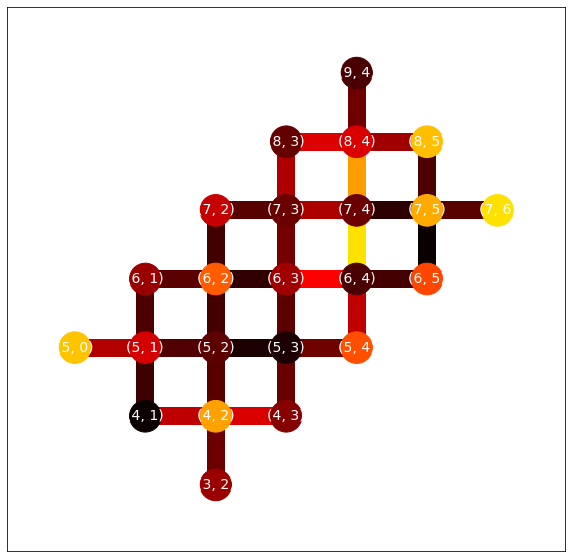

In [10]:
# After running this cell, copy the output timestamp!!
target_calibration = hw.PROCESSOR.get_current_calibration()
TIMESTAMP = target_calibration.timestamp 
# TIMESTAMP = 1627376744797
# target_calibration = hw.PROCESSOR.get_calibration(TIMESTAMP // 1000) 
print("TIMESTAMP:", TIMESTAMP)

# Target specifically these metrics
metric_1q = "single_qubit_rb_average_error_per_gate"
metric_2q = "two_qubit_sqrt_iswap_gate_xeb_average_error_per_cycle"
calibration = calibration_data.CalibrationWrapper(
    calibration_dct=target_calibration, 
    qubits=hw.DEVICE.qubits, 
    metric_1q=metric_1q, 
    metric_2q=metric_2q
)
fig, ax = plt.subplots(figsize=(10, 10))
calibration.plot_noise_graph(ax=ax)
print()

#### Construct the circuits we'll be comparing

Gather simple paths to attempt runs on a random subset of

## Hardware submissions


In [4]:
FACTOR = -1
NEAREST_NEIGHBOR_FURTHER_SWAP = False

def qft_circuits_on_state(qubits, input_state):
    """Construct the qft circuit acting on input |state>
    
    Sorry that this is such spaghetti; I didn't feel the need to rewrite permanent code
    just for some state prep subcircuit.
    """
    state_prep = [(cirq.X**p).on(qubits[i]) for i, p in enumerate(input_state)]
    
    def generator(qubits, factor, nearest_neighbor_further_swap, measure):
        
        x = circuits.qft_line_topology_native(
                            qubits,
                            factor=factor,
                            nearest_neighbor=True,
                            nearest_neighbor_further_swap=nearest_neighbor_further_swap,
                            measure=measure
                        )
        return state_prep + x   
    
    structured_circuit = generator(
        template_qubits, 
        factor=FACTOR, 
        nearest_neighbor_further_swap=NEAREST_NEIGHBOR_FURTHER_SWAP, 
        measure=None)
    
    structured_circuit_LE = circuits.loschmidt_circuit(
        circuit_generator=generator, 
        qubits=template_qubits, 
        nearest_neighbor_further_swap=NEAREST_NEIGHBOR_FURTHER_SWAP,
        factor=FACTOR,
        measure="m")
    
    return structured_circuit, structured_circuit_LE
    

In [5]:
n_qubits = 3
template_qubits = cirq.GridQubit.rect(1, n_qubits)


sample_input_state = [1, 0, 1]
structured_circuit, structured_circuit_LE = qft_circuits_on_state(template_qubits, sample_input_state)
forward_depth = len(structured_circuit)

print("FORWARDS CIRCUIT")
display(structured_circuit)
print("FORWARDS DEPTH=", forward_depth)

print("LOSCHMIDT CIRCUIT")
display(structured_circuit_LE)
print("ROUNDTRIP DEPTH=", len(structured_circuit_LE))

FORWARDS CIRCUIT


(0, 0): ───X─────PhXZ(a=-0.599,x=0.595,z=0.864)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.042,x=0.196,z=-0.13)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────iSwap────────PhXZ(a=-1,x=0.178,z=0)───iSwap───────PhXZ(a=0,x=0.0637,z=0)─────
                                                  │                                     │                                                                                                                                                                                                                                          │                                     │
(0, 1): ───X^0───PhXZ(a=0.25,x=0.5,z=-0.25)───────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.401,x=0.595,z=0.136)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.5,x=0.5,z=-0.136)───iSwap───────PhXZ(a=-0.5,x=0.5,z=0)───iSwap───────PhXZ(a=-1,x=0.5,z=0)───iSwap───────PhXZ(a=0.5,x=0.875,z=-1)───iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0.5)───
                                                                                                                                     │                                     │                                        │                                    │                                  │
(0, 2): ───X─────PhXZ(a=0.25,x=0.5,z=-0.25)──────────────────────────────────────────────────────────────────────────────────────────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=0.5,x=0.5,z=0.5)──────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0)───iSwap^0.5───PhXZ(a=-1,x=0.5,z=0)───iSwap^0.5───PhXZ(a=0,x=0.5,z=0)─────────────────────────────────────────────────────────────────────────────────────

FORWARDS DEPTH= 20
LOSCHMIDT CIRCUIT


(0, 0): ───X─────PhXZ(a=-0.599,x=0.595,z=0.864)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.042,x=0.196,z=-0.13)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────iSwap────────PhXZ(a=-1,x=0.178,z=0)───iSwap───────PhXZ(a=0,x=0.0637,z=0)─────PhXZ(a=0,x=-0.0637,z=0)───iSwap────────PhXZ(a=-1,x=-0.178,z=0)───iSwap──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────PhXZ(a=-0.0884,x=-0.196,z=0.13)────iSwap────────PhXZ(a=-1,x=-0.364,z=0)───iSwap───────PhXZ(a=0.265,x=-0.595,z=-0.864)───X─────M────────
                                                  │                                     │                                                                                                                                                                                                                                          │                                     │                                                                │                                      │                                                                                                                                                                                                                                                     │                                      │                                                   │
(0, 1): ───X^0───PhXZ(a=0.25,x=0.5,z=-0.25)───────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.401,x=0.595,z=0.136)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.5,x=0.5,z=-0.136)───iSwap───────PhXZ(a=-0.5,x=0.5,z=0)───iSwap───────PhXZ(a=-1,x=0.5,z=0)───iSwap───────PhXZ(a=0.5,x=0.875,z=-1)───iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0.5)───PhXZ(a=0,x=-0.5,z=-0.5)───iSwap^-0.5─────────────────────────────iSwap^0.5───PhXZ(a=-0.5,x=-0.875,z=1)───iSwap────────PhXZ(a=-1,x=-0.5,z=0)───iSwap────────PhXZ(a=-0.5,x=-0.5,z=0)───iSwap────────PhXZ(a=0.364,x=-0.5,z=0.136)───iSwap────────PhXZ(a=-1,x=-0.364,z=0)───iSwap───────PhXZ(a=-0.265,x=-0.595,z=-0.136)───iSwap^-0.5─────────────────────────────iSwap^0.5───PhXZ(a=0,x=-0.5,z=0.25)───────────X^0───M────────
                                                                                                                                     │                                     │                                        │                                    │                                  │                                                                                                                                                                                                                            │                                    │                                      │                                           │                                      │                                                                                                                                         │
(0, 2): ───X─────PhXZ(a=0.25,x=0.5,z=-0.25)──────────────────────────────────────────────────────────────────────────────────────────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=0.5,x=0.5,z=0.5)──────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0)───iSwap^0.5───PhXZ(a=-1,x=0.5,z=0)───iSwap^0.5───PhXZ(a=0,x=0.5,z=0)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────PhXZ(a=0,x=-0.5,z=0)────────iSwap^-0.5───PhXZ(a=-1,x=-0.5,z=0)───iSwap^-0.5───PhXZ(a=-0.5,x=-0.5,z=0)───iSwap^-0.5───PhXZ(a=1,x=-0.5,z=-0.5)────────iSwap^-0.5─────────────────────────────iSwap^0.5─────────────────────────────────────────────────────────────────────────────────────────PhXZ(a

ROUNDTRIP DEPTH= 41


In [9]:
STATES = [
    [1, 0, 0],
    [0, 1, 1],
    [1, 1, 1],
    [0, 0, 0],
]

for input_state in STATES:
    dfe = diagnostics.DirectFidelityEstimator(
                mode="qft_sep",
                circuit=structured_circuit,
                qubits=template_qubits,
                repetitions=1,
                readout_calibration=None,
                debug=False,
                input_state=input_state,
                factor=FACTOR,
                nearest_neighbor_further_swap=NEAREST_NEIGHBOR_FURTHER_SWAP
            )    
    measure_circuit = dfe.dump_estimation_circuit()
    s = "".join([str(x) for x in input_state])
    print(f"DFE CIRCUIT FOR QFT|{s}>")
    display(measure_circuit)

DFE CIRCUIT FOR QFT|100>


(0, 0): ───X─────PhXZ(a=-0.599,x=0.595,z=0.864)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.042,x=0.196,z=-0.13)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────iSwap────────PhXZ(a=-1,x=0.178,z=0)───iSwap───────PhXZ(a=0,x=0.0637,z=0)─────Rz(π)────H───M('m')───
                                                  │                                     │                                                                                                                                                                                                                                          │                                     │                                                   │
(0, 1): ───X^0───PhXZ(a=0.25,x=0.5,z=-0.25)───────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.401,x=0.595,z=0.136)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.5,x=0.5,z=-0.136)───iSwap───────PhXZ(a=-0.5,x=0.5,z=0)───iSwap───────PhXZ(a=-1,x=0.5,z=0)───iSwap───────PhXZ(a=0.5,x=0.875,z=-1)───iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0.5)───Rz(0)────H───M────────
                                                                                                                                     │                                     │                                        │                                    │                                  │                                                                                                                                │
(0, 2): ───X─────PhXZ(a=0.25,x=0.5,z=-0.25)──────────────────────────────────────────────────────────────────────────────────────────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=0.5,x=0.5,z=0.5)──────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0)───iSwap^0.5───PhXZ(a=-1,x=0.5,z=0)───iSwap^0.5───PhXZ(a=0,x=0.5,z=0)─────────────────────────────────────────────────────────────────────────────────────Rz(2π)───H───M────────

DFE CIRCUIT FOR QFT|011>


(0, 0): ───X─────PhXZ(a=-0.599,x=0.595,z=0.864)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.042,x=0.196,z=-0.13)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────iSwap────────PhXZ(a=-1,x=0.178,z=0)───iSwap───────PhXZ(a=0,x=0.0637,z=0)─────Rz(0.75π)───H───M('m')───
                                                  │                                     │                                                                                                                                                                                                                                          │                                     │                                                      │
(0, 1): ───X^0───PhXZ(a=0.25,x=0.5,z=-0.25)───────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.401,x=0.595,z=0.136)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.5,x=0.5,z=-0.136)───iSwap───────PhXZ(a=-0.5,x=0.5,z=0)───iSwap───────PhXZ(a=-1,x=0.5,z=0)───iSwap───────PhXZ(a=0.5,x=0.875,z=-1)───iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0.5)───Rz(-π)──────H───M────────
                                                                                                                                     │                                     │                                        │                                    │                                  │                                                                                                                                   │
(0, 2): ───X─────PhXZ(a=0.25,x=0.5,z=-0.25)──────────────────────────────────────────────────────────────────────────────────────────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=0.5,x=0.5,z=0.5)──────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0)───iSwap^0.5───PhXZ(a=-1,x=0.5,z=0)───iSwap^0.5───PhXZ(a=0,x=0.5,z=0)─────────────────────────────────────────────────────────────────────────────────────Rz(1.5π)────H───M────────

DFE CIRCUIT FOR QFT|111>


(0, 0): ───X─────PhXZ(a=-0.599,x=0.595,z=0.864)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.042,x=0.196,z=-0.13)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────iSwap────────PhXZ(a=-1,x=0.178,z=0)───iSwap───────PhXZ(a=0,x=0.0637,z=0)─────Rz(1.75π)───H───M('m')───
                                                  │                                     │                                                                                                                                                                                                                                          │                                     │                                                      │
(0, 1): ───X^0───PhXZ(a=0.25,x=0.5,z=-0.25)───────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.401,x=0.595,z=0.136)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.5,x=0.5,z=-0.136)───iSwap───────PhXZ(a=-0.5,x=0.5,z=0)───iSwap───────PhXZ(a=-1,x=0.5,z=0)───iSwap───────PhXZ(a=0.5,x=0.875,z=-1)───iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0.5)───Rz(-π)──────H───M────────
                                                                                                                                     │                                     │                                        │                                    │                                  │                                                                                                                                   │
(0, 2): ───X─────PhXZ(a=0.25,x=0.5,z=-0.25)──────────────────────────────────────────────────────────────────────────────────────────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=0.5,x=0.5,z=0.5)──────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0)───iSwap^0.5───PhXZ(a=-1,x=0.5,z=0)───iSwap^0.5───PhXZ(a=0,x=0.5,z=0)─────────────────────────────────────────────────────────────────────────────────────Rz(-0.5π)───H───M────────

DFE CIRCUIT FOR QFT|000>


(0, 0): ───X─────PhXZ(a=-0.599,x=0.595,z=0.864)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.042,x=0.196,z=-0.13)──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────iSwap────────PhXZ(a=-1,x=0.178,z=0)───iSwap───────PhXZ(a=0,x=0.0637,z=0)─────Rz(0)───H───M('m')───
                                                  │                                     │                                                                                                                                                                                                                                          │                                     │                                                  │
(0, 1): ───X^0───PhXZ(a=0.25,x=0.5,z=-0.25)───────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.401,x=0.595,z=0.136)───iSwap────────PhXZ(a=-1,x=0.364,z=0)───iSwap───────PhXZ(a=0.5,x=0.5,z=-0.136)───iSwap───────PhXZ(a=-0.5,x=0.5,z=0)───iSwap───────PhXZ(a=-1,x=0.5,z=0)───iSwap───────PhXZ(a=0.5,x=0.875,z=-1)───iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0.5)───Rz(0)───H───M────────
                                                                                                                                     │                                     │                                        │                                    │                                  │                                                                                                                               │
(0, 2): ───X─────PhXZ(a=0.25,x=0.5,z=-0.25)──────────────────────────────────────────────────────────────────────────────────────────iSwap^-0.5────────────────────────────iSwap^0.5───PhXZ(a=0.5,x=0.5,z=0.5)──────iSwap^0.5───PhXZ(a=-0.5,x=0.5,z=0)───iSwap^0.5───PhXZ(a=-1,x=0.5,z=0)───iSwap^0.5───PhXZ(a=0,x=0.5,z=0)─────────────────────────────────────────────────────────────────────────────────────Rz(0)───H───M────────

In [13]:
noise_graph = calibration.noise_graph
# Pre-compute all of the paths
all_paths = []
for source in noise_graph.nodes():
    for target in noise_graph.nodes():
        if source == target:
            continue            
        all_paths_ij = list(nx.all_simple_paths(noise_graph, source, target, cutoff=n_qubits))
        for v in all_paths_ij:
            if len(v) == n_qubits:
                all_paths.append(v)

print("Found {} paths with {} qubits to attempt".format(len(all_paths), n_qubits))

# Shuffle paths
shuffled_paths = [x for x in all_paths]
np.random.seed(492773)
random.shuffle(shuffled_paths)

Found 148 paths with 3 qubits to attempt


In [14]:
DATESTR = "20210728"

For this experiment we run this many submissions:

$$
N ( 2 + 2 N_{STATES} )
$$

which is, for every allocation make two submissions for readout error diagnostic AND for each trial state, make one loschmidt submission and one for direct fidelity estimation. This means we can get away with roughly the same experiment length as before (GHZ experiment with $8N$ submissions)using $4$ different input states, which is not bad.

In [19]:
# Day of trials: for 4 input states, 8 random states, DFE and readout EC got a rep rate of 
# ~65 seconds per state.

# TODO Get rep rate estimates
DRY_RUN = False

def dry_run_print(s, dry_run=DRY_RUN):
    if dry_run:
        print(s)

bf_timestamp = str(TIMESTAMP)
readout_ec_path = "./readout_ec"
if DRY_RUN:
    readout_ec_path = "./dryrun"
    bf_timestamp = str(TIMESTAMP) + str(np.random.randint(99999))
    
BF_REPETITIONS = 10000 # Slightly less important
REPETITIONS = 10000
N_EXPERIMENTS = len(shuffled_paths) # entire state space, sort of*

STATES = [
    [1, 0, 0],
    [0, 1, 1],
    [1, 1, 1],
    [0, 0, 0],
]
N_STATES = len(STATES)

# WARNING: CONVENTION IS CHANGED FOR RESULTS
# results[:,0] stores F_LE, results[:,1:3] stores F and Var(F), results[:,3] stores F0
# Raw refers to no readout error correction, corr refers to yes readout EC
results_raw = np.zeros((N_EXPERIMENTS, 4, N_STATES))
results_corr = np.zeros((N_EXPERIMENTS, 4, N_STATES))

# Configuration for random circuits
N_TRIALS = 5 # Number of random circuits to attempt per qubit configuration
random_results_raw = np.zeros((N_EXPERIMENTS, N_TRIALS))
random_results_corr = np.zeros((N_EXPERIMENTS, N_TRIALS))
seeds = [3882, 175, 802, 993, 22, 7773, 101, 9]
assert len(seeds) >= N_TRIALS


used_paths = []

for i in range(N_EXPERIMENTS):
    if (i % 5) == 0:
        print(f"run={i}")
        
    # Construct the circuit on this path
    v = shuffled_paths[i]
    targets = [cirq.GridQubit(*x) for x in v]
    qubit_map = dict(zip(template_qubits, targets))   
    used_paths.append(v)
    
    # Perform separable readout error diagnostic
    # Every iteration needs a unique identifier for its readout error diagnostic
    hw_diagnostic_sep = diagnostics.SeparableReadoutErrorDiagnostic(
        timestamp=bf_timestamp + f"_{i}" ,
        qubits=targets,
        repetitions=BF_REPETITIONS,
        debug=False,
        path=readout_ec_path
    )
    qvals = hw_diagnostic_sep.run(ntrials=1)
    dry_run_print("...readout error diagnostic complete")
    
    for state_idx, input_state in enumerate(STATES):
        # Generate a fresh loschmidt circuit for this state input
        structured_circuit, structured_circuit_LE = qft_circuits_on_state(template_qubits, input_state)
        forward_depth = len(structured_circuit)

        # Compute structured circuit loschmidt survival
        mapped_LE_circuit = structured_circuit_LE.transform_qubits(qubit_map)
        job = hw.ENGINE.run_sweep(
            program=mapped_LE_circuit,
            repetitions=REPETITIONS,
            processor_ids=[hw.PROCESSOR_ID],
            gate_set=hw.GATESET
        )
        # Raw and corrected F_LE
        LE_counter = job.results()[0].histogram(key="m")
        results_raw[i,0,state_idx] = LE_counter.get(0) / REPETITIONS
        LE_arr = utils.hist_as_np(LE_counter, n_qubits, REPETITIONS)
        results_corr[i,0,state_idx] = hw_diagnostic_sep.invert_and_correct(LE_arr)[0]

        dry_run_print("...F_LE complete")
        # Raw and Corrected F
        mapped_forward_circuit = structured_circuit.transform_qubits(qubit_map)
        dfe = diagnostics.DirectFidelityEstimator(
            mode="qft_sep",
            circuit=mapped_forward_circuit,
            qubits=targets,
            repetitions=REPETITIONS,
            readout_calibration=hw_diagnostic_sep,
            debug=False,
            input_state=input_state,
            factor=FACTOR,
            nearest_neighbor_further_swap=NEAREST_NEIGHBOR_FURTHER_SWAP
        )    

        fid_raw, fid_corr, var_raw, var_corr = dfe.run()
        results_corr[i,1,state_idx] = fid_corr
        results_corr[i,2,state_idx] = var_corr
        results_raw[i,1,state_idx] = fid_raw
        results_raw[i,2,state_idx] = var_raw
        dry_run_print("...F DFE complete")
    # Random <F_LE>
    for j in range(N_TRIALS):
        rand_fwd_depth = forward_depth // 2
        random_circuit_LE = circuits.loschmidt_circuit(
            circuits.create_random_line_circuit, 
            template_qubits, 
            depth=rand_fwd_depth, 
            seed=seeds[j], 
            measure="m")
        random_circuit_LE = random_circuit_LE.transform_qubits(qubit_map)
        # Submit hardware random circuit
        job = hw.ENGINE.run_sweep(
            program=random_circuit_LE,
            repetitions=REPETITIONS,
            processor_ids=[hw.PROCESSOR_ID],
            gate_set=hw.GATESET
        )
        # Raw and corrected outcomes
        random_counter = job.results()[0].histogram(key="m")
        random_results_raw[i, j] = random_counter.get(0) / REPETITIONS
        rand_arr = utils.hist_as_np(random_counter, n_qubits, REPETITIONS)
        random_results_corr[i,j] = hw_diagnostic_sep.invert_and_correct(rand_arr)[0]
        
    dry_run_print("...Random F_LE complete")

    # Compute F_0 for this path, with and without readou error corr
    # This doesn't use the third dimension of the array so keep that in mind...
    F0 = metrics.compute_calibration_fidelity(mapped_forward_circuit, noise_graph)
    F0_readout_err = metrics.compute_calibration_fidelity(mapped_forward_circuit, noise_graph, readout_error=True)
    results_corr[i,3,0] = F0
    results_raw[i,3,0] = F0_readout_err
    
    if DRY_RUN:
        break
    # Caching
#     raise NotImplementedError("Don't run this experiment; you will overwrite saved data.")
    np.save(f"./temp/v3_hw_{DATESTR}_qft_line_results_corr_{i}.npy", results_corr)
    np.save(f"./temp/v3_hw_{DATESTR}_qft_line_results_raw_{i}.npy", results_raw)
    np.save(f"./temp/v3_hw_{DATESTR}_qft_line_paths_{i}.npy", np.asarray(used_paths))
    np.save(f"./temp/v3_hw_{DATESTR}_random_line_results_raw_{i}.npy", random_results_raw)
    np.save(f"./temp/v3_hw_{DATESTR}_random_line_results_corr_{i}.npy", random_results_corr)
    
if not DRY_RUN:
    np.save(f"./results/v3_hw_{DATESTR}_qft_line_results_corr.npy", results_corr)
    np.save(f"./results/v3_hw_{DATESTR}_qft_line_results_raw.npy", results_raw)
    np.save(f"./results/v3_hw_{DATESTR}_qft_line_paths.npy", np.asarray(used_paths))
    np.save(f"./results/v3_hw_{DATESTR}_random_line_results_raw.npy", random_results_raw)
    np.save(f"./results/v3_hw_{DATESTR}_random_line_results_corr.npy", random_results_corr)


run=0
run=5
run=10
run=15
run=20
run=25
run=30
run=35
run=40
run=45
run=50
run=55
run=60
run=65
run=70
run=75
run=80
run=85
run=90
run=95
run=100
run=105
run=110
run=115
run=120
run=125
run=130
run=135
run=140
run=145
